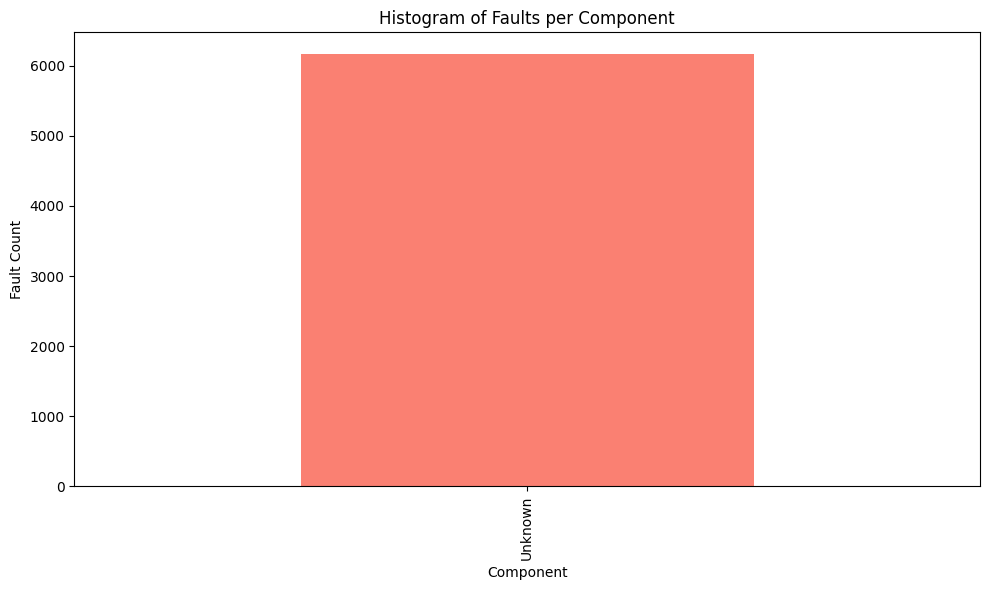

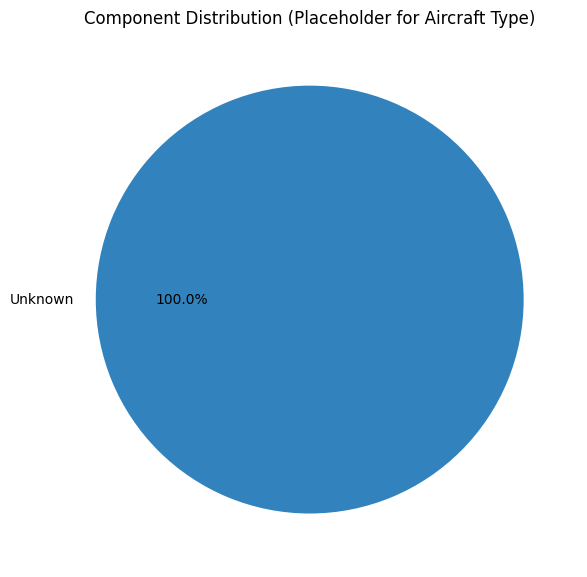

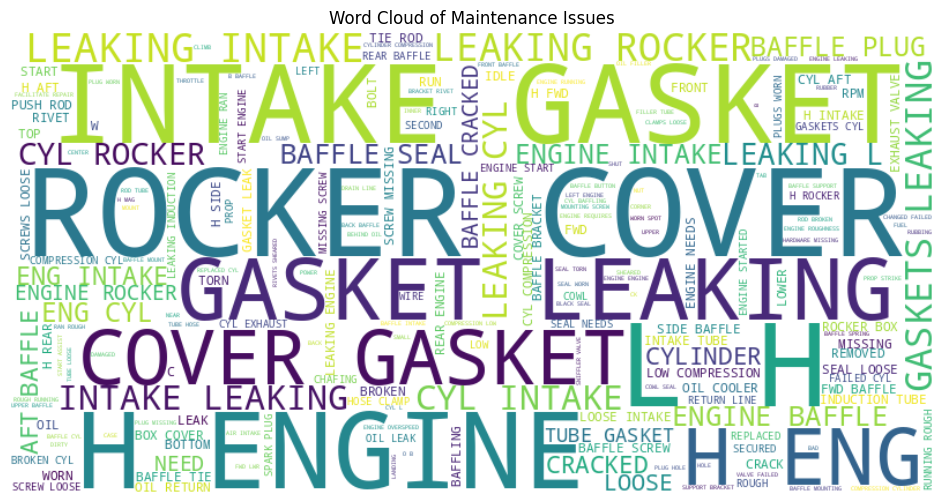

'\n1. Integrate data backend and preprocessing.\n2. Build modular visual elements: (a) tree/sunburst for hierarchy, (b) networkx-based graph, (c) word cloud or topic bubble.\n3. Enable filter/search on aircraft/component/type.\n4. Use color/size cues to highlight criticalities (see Q1 & Q3).\n5. Deploy into interactive framework (Plotly Dash, Streamlit, Tableau, etc.).\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# 1. Color Schemes for Indicating Component Health
color_scheme = {
    'Healthy': 'green',
    'Warning': 'yellow',
    'Critical': 'red',
    'Unknown': 'grey'
}

# 2. Visualization Pipeline
# ----------------------------------
# Load data
df = pd.read_csv('Aircraft_Annotation_DataFile.csv')

# --- Data Cleaning/Engineering here ---
# Create 'component' column by extracting from 'PROBLEM'
df['component'] = df['PROBLEM'].str.extract(r'(engine|rocker cover|cylinder|intake|baffle|clamp|plug|gasket)', expand=False)
df['component'] = df['component'].fillna('Unknown')


# Pipeline: Load raw -> Clean/Standardize columns -> Aggregate metrics -> Visualizations -> Dashboard layout

# 3. Gestalt Principles for Highlighting Critical Faults
# Example: Use color & spatial grouping in plots, bold labels for critical components

# 4a. Univariate: Histogram of Faults Per Component
plt.figure(figsize=(10,6))
df['component'].value_counts().plot(kind='bar', color='salmon')
plt.title('Histogram of Faults per Component')
plt.xlabel('Component')
plt.ylabel('Fault Count')
plt.tight_layout()
plt.show()

# 4b. Univariate: Pie Chart of Aircraft Types
# Assuming 'aircraft_type' column exists or can be created
# For now, using the 'component' column as a placeholder for demonstration
plt.figure(figsize=(6,6))
df['component'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='tab20c')
plt.title('Component Distribution (Placeholder for Aircraft Type)')
plt.ylabel('')
plt.tight_layout()
plt.show()


# 5a. Bivariate: Scatterplot of Faults vs. Flight Hours
# Assuming 'aircraft_id' and 'flight_hours' columns exist or can be created
# For now, skipping this visualization as 'flight_hours' is not available
# plt.figure(figsize=(8,6))
# fault_counts = df.groupby('aircraft_id').size().reset_index(name='faults')
# merged = fault_counts.merge(df[['aircraft_id','flight_hours']].drop_duplicates(), on='aircraft_id')
# sns.scatterplot(x='flight_hours', y='faults', data=merged)
# plt.title('Faults vs. Flight Hours')
# plt.xlabel('Flight Hours')
# plt.ylabel('Fault Count')
# plt.show()

# 5b. Boxplot: Maintenance Time by Component Type
# Assuming 'maintenance_time' column exists or can be created
# For now, skipping this visualization as 'maintenance_time' is not available
# plt.figure(figsize=(10,6))
# sns.boxplot(x='component', y='maintenance_time', data=df)
# plt.title('Maintenance Time by Component')
# plt.xlabel('Component')
# plt.ylabel('Maintenance Time (min)')
# plt.tight_layout()
# plt.show()

# 6a. Multivariate: Pair Plot (Faults, Maintenance Time, Aircraft Age)
# Assuming 'faults', 'maintenance_time', and 'aircraft_age' columns exist or can be created
# For now, skipping this visualization as these columns are not available
# sns.pairplot(df[['faults','maintenance_time','aircraft_age']])
# plt.show()

# 6b. Combined Visualization
# Assuming 'faults', 'maintenance_time', 'aircraft_age', and 'aircraft_type' columns exist or can be created
# For now, skipping this visualization
# fig = px.scatter_matrix(df, dimensions=['faults','maintenance_time','aircraft_age'], color='aircraft_type')
# fig.show()

# 7. Hierarchical Visualization: Aircraft Type > Component > Faults (Sunburst)
# Assuming 'aircraft_type', 'component', and 'fault_type' columns exist or can be created
# Creating 'fault_type' column by extracting from 'PROBLEM'
df['fault_type'] = df['PROBLEM'].str.extract(r'(killed|choke|lose power|leaking|cracked|cold|shock|stuck)', expand=False)
df['fault_type'] = df['fault_type'].fillna('Other')
df['aircraft_type'] = 'Unknown' # Placeholder

fig = px.sunburst(df, path=['aircraft_type', 'component', 'fault_type'], values=None) # values=None as we don't have a count column
fig.show()

# 8. Network Graph of Component Dependencies
# Assuming 'dependent_component' column exists or can be created
# For now, skipping this visualization
# G = nx.from_pandas_edgelist(df, 'component', 'dependent_component') # add or create such a column
# plt.figure(figsize=(10,10))
# nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', edge_color='grey')
# plt.title('Component Dependency Network')
# plt.show()

# 9a. Text Vectorization on Maintenance Reports
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['ACTION'].fillna(''))  # use 'PROBLEM' if more relevant

# 9b. Word Cloud of Common Issues
text = ' '.join(df['PROBLEM'].fillna(''))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Maintenance Issues')
plt.show()

# 10. Steps for Designing Dashboards with Hierarchical, Network, and Text Data
'''
1. Integrate data backend and preprocessing.
2. Build modular visual elements: (a) tree/sunburst for hierarchy, (b) networkx-based graph, (c) word cloud or topic bubble.
3. Enable filter/search on aircraft/component/type.
4. Use color/size cues to highlight criticalities (see Q1 & Q3).
5. Deploy into interactive framework (Plotly Dash, Streamlit, Tableau, etc.).
'''

# 11. Map Hangar Locations (Point Data)
# Assuming 'hangar_lat', 'hangar_lon', 'hangar', and 'region' columns exist or can be created
# For now, skipping this visualization
# fig = px.scatter_mapbox(df, lat='hangar_lat', lon='hangar_lon', hover_name='hangar', zoom=3,
#                         mapbox_style='carto-positron', color='region')
# fig.update_layout(title='Hangar Locations Map')
# fig.show()

# 12. Maintenance Timeline (Line Data)
# Assuming 'inspection_time' column exists and is in datetime format
# For now, skipping this visualization
# timeline_df = df.sort_values('inspection_time')
# plt.figure(figsize=(12,6))
# plt.plot(timeline_df['inspection_time'], np.arange(len(timeline_df)), marker='o')
# plt.title('Aircraft Maintenance Timeline')
# plt.xlabel('Inspection Time')
# plt.ylabel('Cumulative Maintenance Events')
# plt.tight_layout()
# plt.show()

# 13. Fault Heatmap by Aircraft Type (Area Data)
# Assuming 'component', 'aircraft_type', and 'faults' columns exist or can be created
# For now, skipping this visualization as 'faults' is not available
# pivot = pd.pivot_table(df, index='component', columns='aircraft_type', values='faults', aggfunc='sum', fill_value=0)
# sns.heatmap(pivot, annot=True, cmap='Reds')
# plt.title('Heatmap of Faults by Aircraft Type and Component')
# plt.show()

# 14. Animated Visualization: Maintenance over Time (needs plotly)
# Assuming 'component', 'fault_type', and 'inspection_time' columns exist or can be created
# For now, skipping this visualization
# fig = px.histogram(df, x='component', color='fault_type', animation_frame='inspection_time',
#                    title='Animated Maintenance Events Over Time')
# fig.show()

# 15. Time Series: Faults Per Month
# Assuming 'inspection_time' column exists and is in datetime format
# For now, skipping this visualization
# df['inspection_time'] = pd.to_datetime(df['inspection_time'])
# df['month'] = df['inspection_time'].dt.to_period('M')
# monthly_faults = df.groupby('month').size()
# monthly_faults.plot(kind='line', marker='o', figsize=(12,6))
# plt.title('Monthly Faults Time Series')
# plt.xlabel('Month')
# plt.ylabel('Number of Faults')
# plt.show()

# 16. Weekday vs. Weekend Maintenance
# Assuming 'inspection_time' column exists and is in datetime format
# For now, skipping this visualization
# df['weekday'] = df['inspection_time'].dt.day_name()
# df['is_weekend'] = df['weekday'].isin(['Saturday','Sunday'])
# sns.countplot(x='is_weekend', data=df)
# plt.title('Maintenance Events: Weekday vs Weekend')
# plt.xlabel('Is Weekend')
# plt.ylabel('Count')
# plt.show()

# 17 & 18. Predictive Analytics (Regression/Clustering for Failure Prediction)
# Assuming 'flight_hours','maintenance_time','aircraft_age','component_encoded', and 'failure_next_30days' columns exist or can be created
# For now, skipping this visualization
# features = df[['flight_hours','maintenance_time','aircraft_age','component_encoded']]
# target = df['failure_next_30days'] # create/engineer this label appropriately
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# reg = LinearRegression()
# reg.fit(X_train, y_train)
# score = reg.score(X_test, y_test)
# print(f"Regression R^2 Score: {score:.2f}")

# Clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# clusters = kmeans.fit_predict(features)
# df['failure_cluster'] = clusters
# sns.scatterplot(x='flight_hours', y='maintenance_time', hue='failure_cluster', data=df)
# plt.title('Clustering for Failure Risk Segmentation')
# plt.show()

# For model evaluation, use train_test_split, cross_val_score, confusion_matrix, etc. as needed for your setup.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

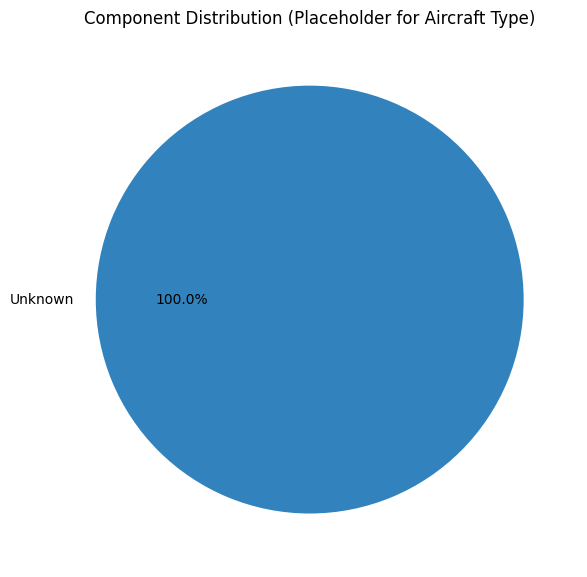

In [ ]:
# 4b. Univariate: Pie Chart of Aircraft Types
# Assuming 'aircraft_type' column exists or can be created
# For now, using the 'component' column as a placeholder for demonstration
plt.figure(figsize=(6,6))
df['component'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='tab20c')
plt.title('Component Distribution (Placeholder for Aircraft Type)')
plt.ylabel('')
plt.tight_layout()
plt.show()